In [1]:
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data(file: str) -> pd.DataFrame:
    data = []
    with open(f"data\\{file}", "r") as file:
        for idx, line in enumerate(file.readlines()):
            # Skip Metadata lines
            if idx in [0, 1, 2, 3, 4, 6]:
                continue

            data.append(line)

    return pd.read_csv(StringIO("".join(data))).rename(
        columns={
            "Load (lbf)": "Load (lbs)",
        }
    )

In [3]:
brush_tests = [
    "1",
    "2",
    "3",
    "4",
    # "5",
    # "5a",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
]

dataframes = {}
for brush in brush_tests:
    dataframes[brush] = get_data(f"Ankenman brushes_{brush}.txt")

In [4]:
df = (
    pd.concat(
        [df.reset_index(drop=True) for df in dataframes.values()],
        keys=dataframes.keys(),
        names=["Brush"],
    )
    .reset_index()
    .drop(columns=["level_1"])
)
df_load_max = df.groupby("Brush").max()[["Load (lbs)"]]
df_load_max = df_load_max.reindex(brush_tests)

In [5]:
df_load_max = df_load_max.drop([])
df_load_max

,Load (lbs)
Brush,
1,216
2,107
3,152
4,236
6,127
7,208
8,232
9,220
10,245


In [6]:
n = len(df_load_max)
sample_mean = df_load_max["Load (lbs)"].mean()
sample_median = df_load_max["Load (lbs)"].median()
sample_stddev = df_load_max["Load (lbs)"].std()

In [7]:
def E1(x: np.ndarray) -> np.float64:
    return np.mean(x) - 1.28 * np.std(x, ddof=1)

In [8]:
def get_E1_confidence_interval(sample_size: int) -> np.ndarray:
    data = np.random.normal(
        loc=sample_mean, scale=sample_stddev, size=(10_000, sample_size)
    )

    E1_values = np.apply_along_axis(E1, 1, data)

    E1_mean = E1_values.mean()
    E1_stddev = E1_values.std(ddof=1)

    return np.array([E1_mean - 2 * E1_stddev, E1_mean + 2 * E1_stddev])

In [9]:
E1_intervals = []
for sample_size in range(5, 200, 5):
    E1_intervals.append(get_E1_confidence_interval(sample_size))

E1_intervals = np.array(E1_intervals)
E1_intervals

array([[ 66.64203197, 184.01733521],
       [ 82.15653435, 164.22939445],
       [ 89.59330612, 155.97523607],
       [ 93.82190956, 150.94986753],
       [ 96.24746362, 148.14266405],
       [ 98.66685928, 145.95620115],
       [100.5342256 , 143.45215685],
       [101.65574384, 142.48464951],
       [102.69135584, 140.95532622],
       [103.76165376, 139.94525932],
       [104.6321443 , 138.96240845],
       [105.26187261, 138.33040393],
       [106.35217565, 137.83444625],
       [106.62479404, 137.12875351],
       [106.85163216, 136.62538707],
       [107.57083494, 135.94975022],
       [107.99173157, 135.58932612],
       [108.12907203, 135.33189452],
       [108.68958099, 134.82295612],
       [108.99118244, 134.53842528],
       [109.19245684, 134.10699436],
       [109.462879  , 133.89201829],
       [109.58353738, 133.68256794],
       [109.85804045, 133.48273421],
       [110.24115758, 133.19519086],
       [110.58123217, 132.75373305],
       [110.65773121, 132.72299011],
 

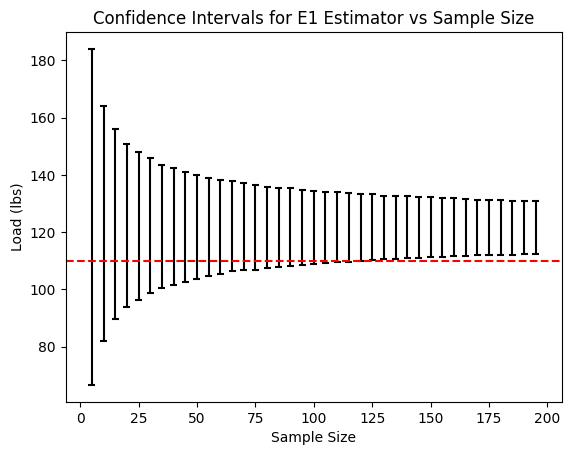

In [10]:
for idx, sample_size in enumerate(range(5, 200, 5)):
    interval = E1_intervals[idx]
    plt.vlines(x=sample_size, ymin=interval[0], ymax=interval[1], color="black")
    plt.hlines(
        y=interval[0], xmin=sample_size - 1.5, xmax=sample_size + 1.5, color="black"
    )
    plt.hlines(
        y=interval[1], xmin=sample_size - 1.5, xmax=sample_size + 1.5, color="black"
    )

plt.axhline(y=110, color="red", linestyle="--", label="110 lbs Threshold")

plt.title("Confidence Intervals for E1 Estimator vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Load (lbs)")

plt.show()